In [1]:
# !pip install pandas numpy==1.24.3 SciPy==1.10.0 scikit-learn==1.3.0 matplotlib==3.7.2 seaborn==0.12.2 openpyxl==3.0.10 networkx==3.1

In [2]:
# # =======================
# # Mount Google Drive
# # =======================
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# import the necessary libraries
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import networkx as nx
import random
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# let's check the version of the libraies

# Check the versions of the libraries
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("SciPy version:", scipy.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("OpenPyXL version:", openpyxl.__version__)
print("NetworkX version:", nx.__version__)

Pandas version: 2.2.2
NumPy version: 1.24.3
SciPy version: 1.10.0
Scikit-learn version: 1.3.0
Matplotlib version: 3.7.2
Seaborn version: 0.12.2
OpenPyXL version: 3.0.10
NetworkX version: 3.1


In [5]:
# file path
input_path = "data/maternal_pregnancy_risk_dataset.csv"

# load the dataset
df = pd.read_csv(input_path)

In [6]:
df.head()

,Age,Gravida,Tetanus Toxoid,Gestational,Weight,Height in feet,Height in meter,Systolic,Diastolic,Anemia,Jaundice,Fetal position,Fetal Movement,Fetal Heart Beat,Urine test albumin,Urine test sugar,VDRL,HRsAG,High-risk pregnancy
0,18,0,1,38,110.0,5.3,1.61544,100,60,1.0,0,0,0,140,NaN,0,1,1,0
1,25,1,2,38,132.0,5.2,1.58496,100,70,1.0,0,0,0,130,NaN,0,0,1,1
2,20,0,1,30,121.0,5.0,1.52400,100,60,1.0,0,0,0,120,NaN,0,1,1,0
3,22,0,3,35,112.2,5.4,1.64592,110,65,1.0,0,0,0,130,NaN,0,0,1,0
4,20,0,2,30,116.6,5.2,1.58496,100,55,1.0,0,0,0,125,NaN,0,1,1,1


In [7]:
# Rename the column "Gestational " to "Gestational" to remove the extra space
df.rename(columns={'Gestational ': 'Gestational'}, inplace=True)

In [8]:
df.columns

Index(['Age', 'Gravida', 'Tetanus Toxoid', 'Gestational', 'Weight',
       'Height in feet', 'Height in meter', 'Systolic', 'Diastolic', 'Anemia',
       'Jaundice', 'Fetal position', 'Fetal Movement', 'Fetal Heart Beat',
       'Urine test albumin', 'Urine test sugar', 'VDRL', 'HRsAG',
       'High-risk pregnancy'],
      dtype='object')

In [9]:
df.shape

(998, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  998 non-null    int64  
 1   Gravida              998 non-null    int64  
 2   Tetanus Toxoid       998 non-null    int64  
 3   Gestational          998 non-null    int64  
 4   Weight               998 non-null    float64
 5   Height in feet       998 non-null    float64
 6   Height in meter      998 non-null    float64
 7   Systolic             998 non-null    int64  
 8   Diastolic            998 non-null    int64  
 9   Anemia               869 non-null    float64
 10  Jaundice             998 non-null    int64  
 11  Fetal position       998 non-null    int64  
 12  Fetal Movement       998 non-null    int64  
 13  Fetal Heart Beat     998 non-null    int64  
 14  Urine test albumin   134 non-null    float64
 15  Urine test sugar     998 non-null    int

In [11]:
df.describe()

,Age,Gravida,Tetanus Toxoid,Gestational,Weight,Height in feet,Height in meter,Systolic,Diastolic,Anemia,Jaundice,Fetal position,Fetal Movement,Fetal Heart Beat,Urine test albumin,Urine test sugar,VDRL,HRsAG,High-risk pregnancy
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,869.000000,998.0,998.000000,998.0,998.000000,134.000000,998.000000,998.000000,998.000000,998.000000
mean,22.962926,0.161323,1.788577,28.938878,123.451303,5.249699,1.600108,102.825651,64.574148,0.858458,0.0,0.006012,0.0,132.279559,0.358209,0.108216,0.500000,0.890782,0.332665
std,3.568168,0.368013,0.705609,4.969241,11.679395,0.162894,0.049650,9.343101,7.914032,0.348781,0.0,0.077343,0.0,8.889661,0.481273,0.310809,0.500251,0.312069,0.471404
min,18.000000,0.000000,1.000000,20.000000,99.000000,5.000000,1.524000,80.000000,55.000000,0.000000,0.0,0.000000,0.0,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,1.000000,25.000000,114.400000,5.100000,1.554480,100.000000,60.000000,1.000000,0.0,0.000000,0.0,125.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,22.000000,0.000000,2.000000,30.000000,123.200000,5.200000,1.584960,100.000000,60.000000,1.000000,0.0,0.000000,0.0,130.000000,0.000000,0.000000,0.500000,1.000000,0.000000
75%,25.000000,0.000000,2.000000,32.000000,134.200000,5.400000,1.645920,110.000000,70.000000,1.000000,0.0,0.000000,0.0,140.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,32.000000,1.000000,3.000000,38.000000,143.000000,5.600000,1.706880,120.000000,80.000000,1.000000,0.0,1.000000,0.0,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.isnull().sum()

,0
Age,0
Gravida,0
Tetanus Toxoid,0
Gestational,0
Weight,0
Height in feet,0
Height in meter,0
Systolic,0
Diastolic,0
Anemia,129


In [13]:
# Since the value of both columns 'Fetal Movement' and 'Jaundice' is zero (0) we will drop these columns.
print(df['Fetal Movement'].unique())
print(df['Jaundice'].unique())

[0]
[0]


In [14]:
# Drop the "Urine test albumin" column since the najority of the values of this column are NaN.
df = df.drop(columns=["Urine test albumin", "Fetal Movement", "Jaundice"])

# Fill the anemia column with foraward fill method
df.ffill(inplace=True)

In [15]:
df.isnull().sum()

,0
Age,0
Gravida,0
Tetanus Toxoid,0
Gestational,0
Weight,0
Height in feet,0
Height in meter,0
Systolic,0
Diastolic,0
Anemia,0


In [16]:
df.shape

(998, 16)

In [17]:
df.columns

Index(['Age', 'Gravida', 'Tetanus Toxoid', 'Gestational', 'Weight',
       'Height in feet', 'Height in meter', 'Systolic', 'Diastolic', 'Anemia',
       'Fetal position', 'Fetal Heart Beat', 'Urine test sugar', 'VDRL',
       'HRsAG', 'High-risk pregnancy'],
      dtype='object')

## **Patient Similarity Network Based on BMI**

In [18]:
# Create a unique ID for each patient
df['ID'] = df.index

# Calculate BMI (Weight in kg / (Height in meters)^2)
# Assuming 'Height in meter' is in meters and 'Weight' is in kg
df['BMI'] = df['Weight'] / (df['Height in meter'] ** 2)

# Create a graph
G = nx.Graph()

# Add nodes for each patient
for index, row in df.iterrows():
    G.add_node(row['ID'], age=row['Age'], bmi=row['BMI'])

# Add edges based on some criteria (e.g., similar BMI)
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        if abs(df.loc[i, 'BMI'] - df.loc[j, 'BMI']) < 2.0:  # example condition for similarity
            G.add_edge(df.loc[i, 'ID'], df.loc[j, 'ID'])

# Display the graph info
print("Nodes in the graph:", G.nodes(data=True))
print("Edges in the graph:", G.edges())

Nodes in the graph: [(0.0, {'age': 18.0, 'bmi': 42.15130458661693}), (1.0, {'age': 25.0, 'bmi': 52.545716531275275}), (2.0, {'age': 20.0, 'bmi': 52.09732641687505}), (3.0, {'age': 22.0, 'bmi': 41.416692344130006}), (4.0, {'age': 20.0, 'bmi': 46.415382935959826}), (5.0, {'age': 22.0, 'bmi': 55.5369772365415}), (6.0, {'age': 20.0, 'bmi': 52.09732641687505}), (7.0, {'age': 22.0, 'bmi': 42.22878435087765}), (8.0, {'age': 32.0, 'bmi': 44.68038286181394}), (9.0, {'age': 21.0, 'bmi': 44.663859051583984}), (10.0, {'age': 23.0, 'bmi': 52.26761768740499}), (11.0, {'age': 24.0, 'bmi': 45.40413121230283}), (12.0, {'age': 20.0, 'bmi': 45.47715237786824}), (13.0, {'age': 24.0, 'bmi': 46.96979090927879}), (14.0, {'age': 23.0, 'bmi': 59.178746235658984}), (15.0, {'age': 20.0, 'bmi': 52.09732641687505}), (16.0, {'age': 30.0, 'bmi': 53.421478473463196}), (17.0, {'age': 20.0, 'bmi': 48.89551332047564}), (18.0, {'age': 18.0, 'bmi': 49.04266876252359}), (19.0, {'age': 26.0, 'bmi': 59.178746235658984}), (20

## **Visualization of Patient Similarity Network Based on BMI**

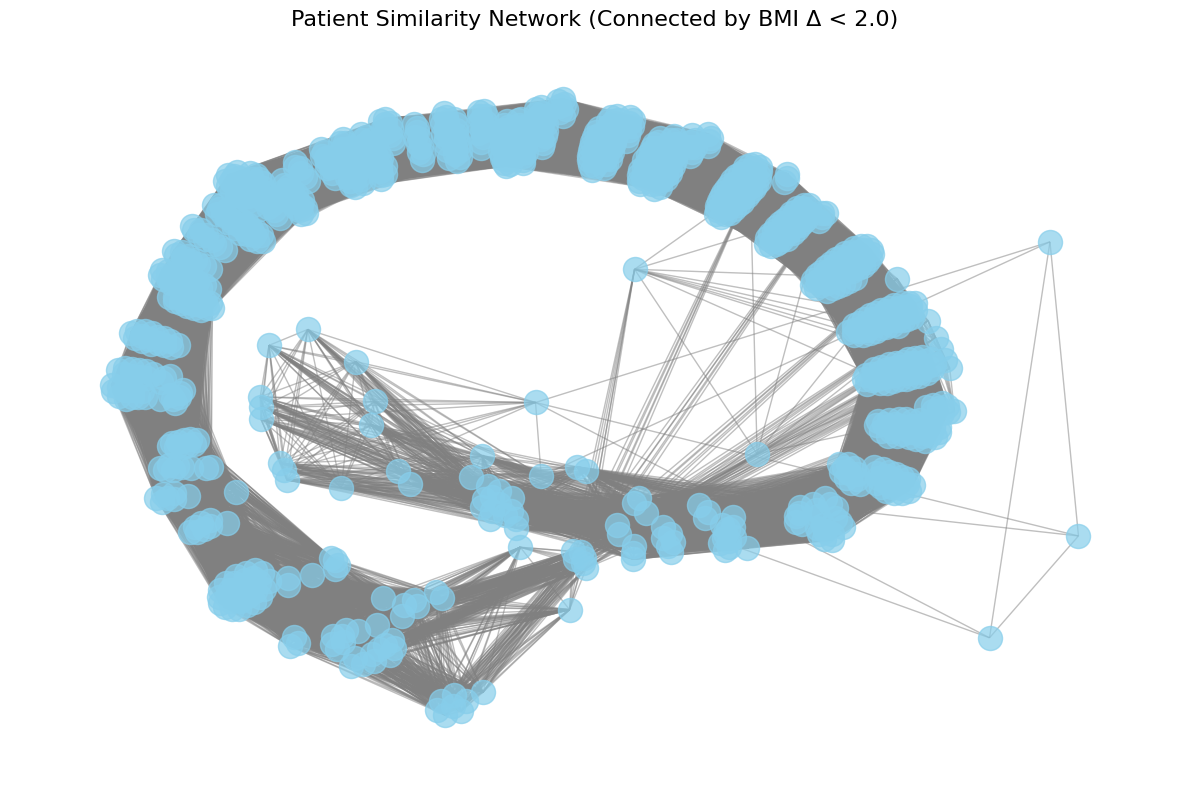

In [19]:
# Set figure size
plt.figure(figsize=(12, 8))

# Choose a layout for the graph
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Adjusted for better spacing

# Draw nodes with a specific color and size
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue', alpha=0.7)

# Draw edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')

# # Optional: Label nodes with 'ID' or attributes
# labels = {node: f"ID: {node}\nAge: {data['age']}\nBMI: {data['bmi']:.1f}"
#           for node, data in G.nodes(data=True)}
# nx.draw_networkx_labels(G, pos, labels, font_size=8, font_family="sans-serif")

# Set title and remove axes
plt.title("Patient Similarity Network (Connected by BMI Δ < 2.0)", size=16)
plt.axis("off")  # Remove axes
plt.tight_layout()
plt.show()

# **1. Distribution Plots**

## a. Enhanced Box Plot (Age vs Risk Status)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


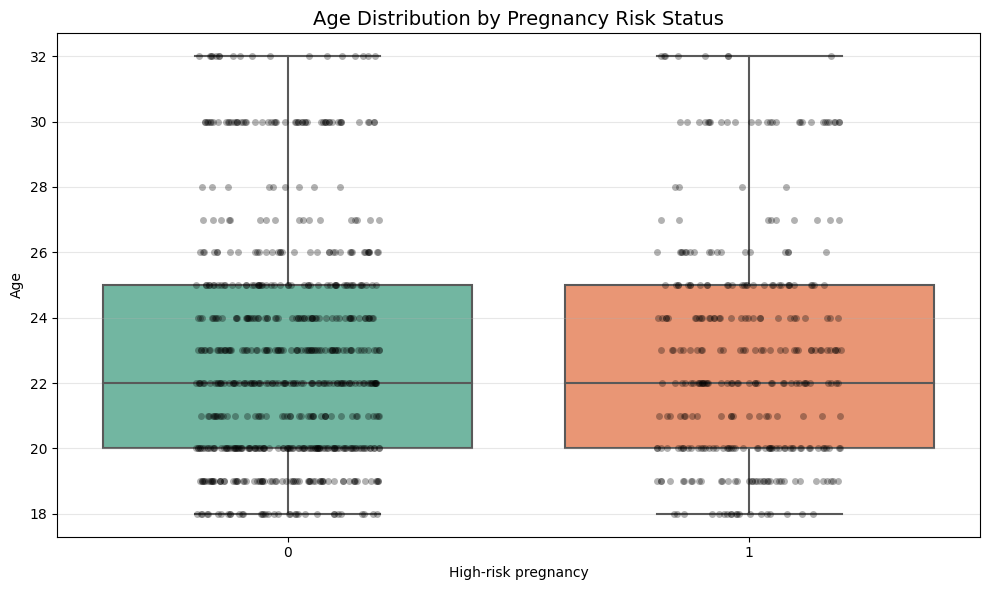

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='High-risk pregnancy', y='Age', data=df, palette=['#66c2a5','#fc8d62'])
sns.stripplot(x='High-risk pregnancy', y='Age', data=df, color='black', alpha=0.3, jitter=0.2)
plt.title('Age Distribution by Pregnancy Risk Status', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## b. Violin Plot (BMI Distribution)

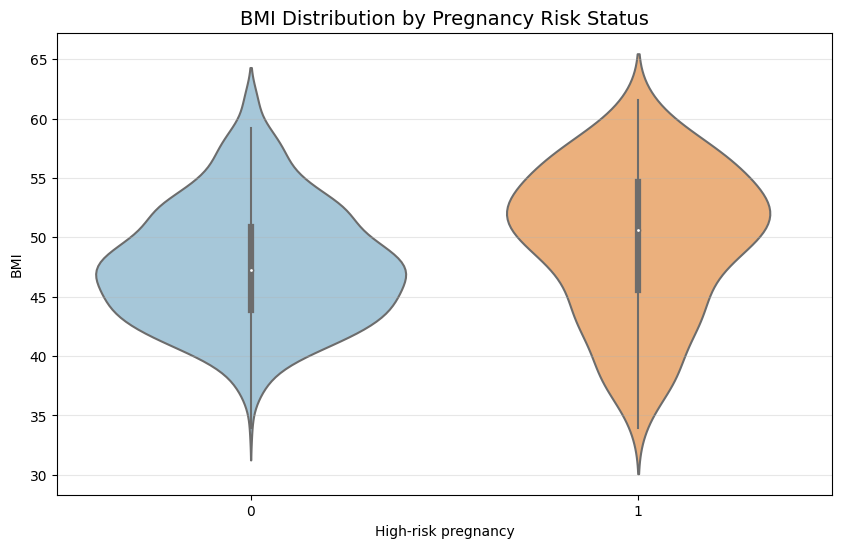

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='High-risk pregnancy', y='BMI', data=df, palette=['#9ecae1','#fdae6b'])
plt.title('BMI Distribution by Pregnancy Risk Status', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.show()

# **2. Relationship Plots**

## a. Scatter Plot Matrix

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

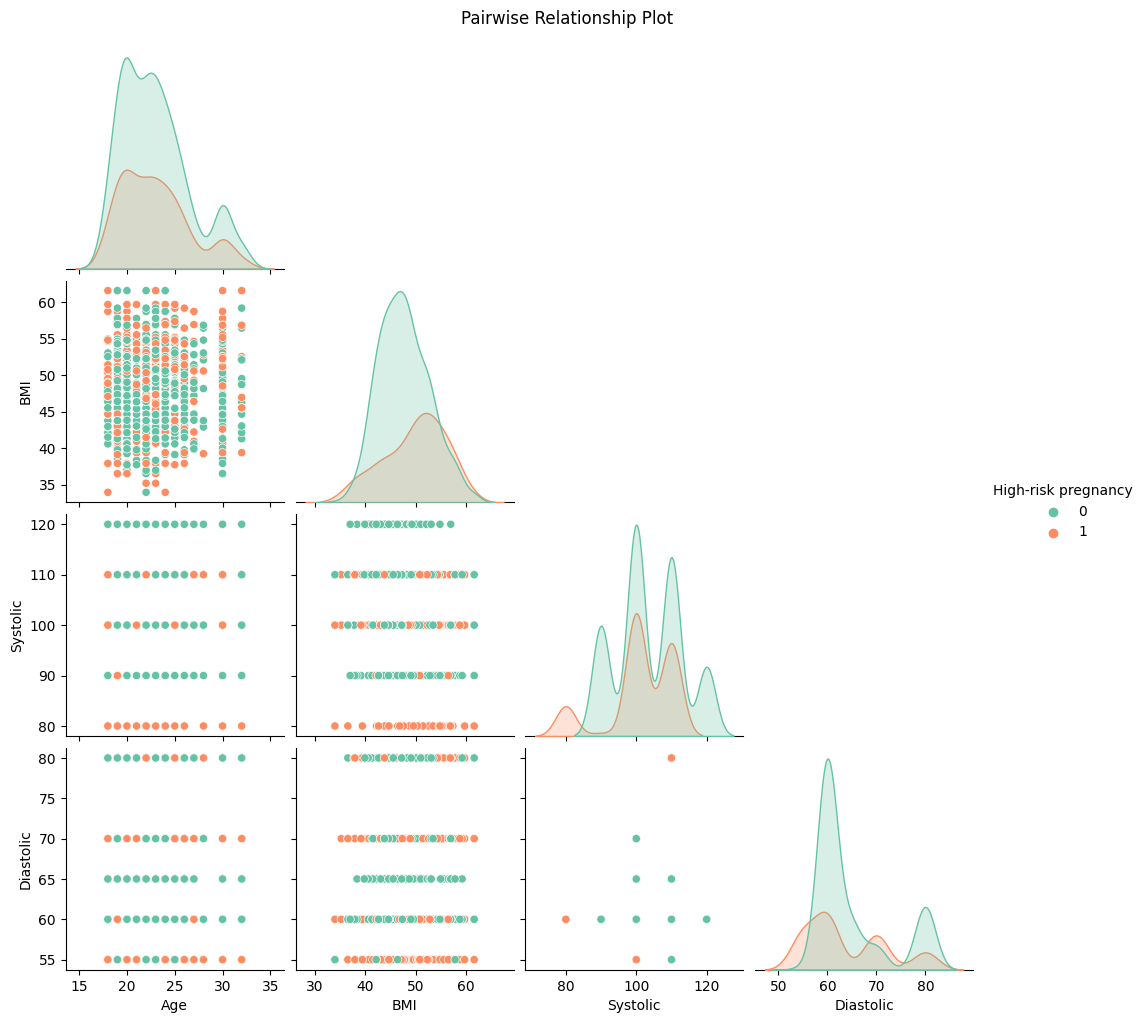

In [22]:
sns.pairplot(df[['Age', 'BMI', 'Systolic', 'Diastolic', 'High-risk pregnancy']],
             hue='High-risk pregnancy', palette='Set2', corner=True)
plt.suptitle('Pairwise Relationship Plot', y=1.02)
plt.show()

## b. Correlation Heatmap

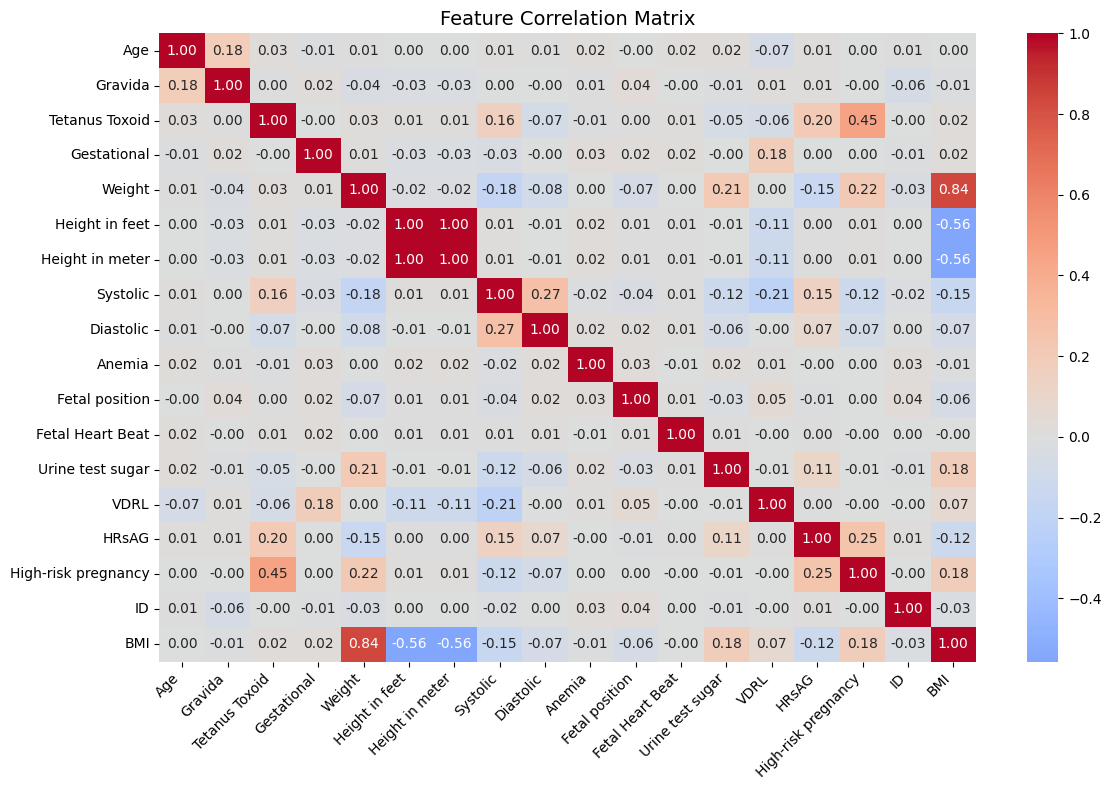

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## **3. Categorical Analysis**

## a. Stacked Bar Chart (Risk by Age Group)

/tmp/ipython-input-24-2212113713.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_age = df.groupby(['Age Group', 'High-risk pregnancy']).size().unstack()


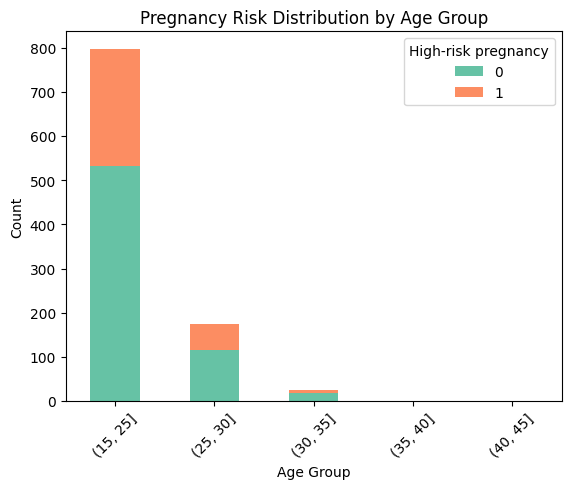

In [24]:
df['Age Group'] = pd.cut(df['Age'], bins=[15,25,30,35,40,45])
risk_by_age = df.groupby(['Age Group', 'High-risk pregnancy']).size().unstack()
risk_by_age.plot(kind='bar', stacked=True, color=['#66c2a5','#fc8d62'])
plt.title('Pregnancy Risk Distribution by Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## **4. Advanced Visualizations**

## a. PCA Projection (2D)

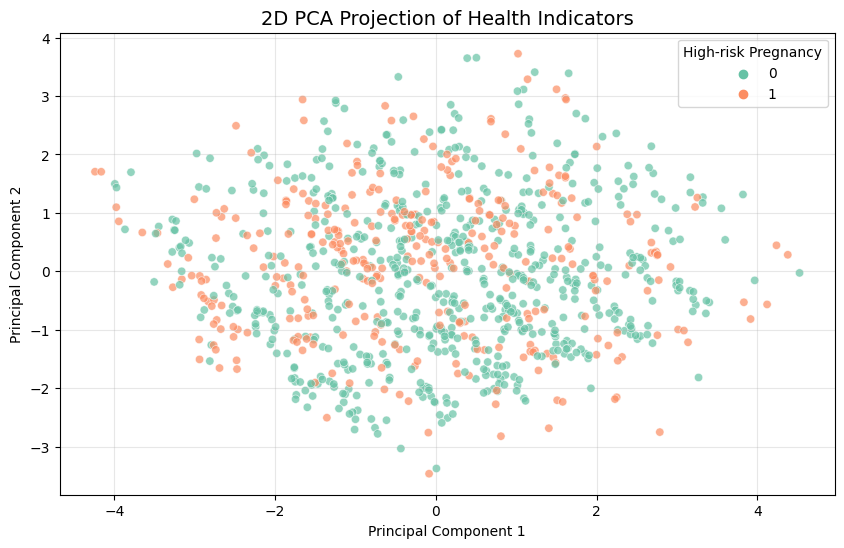

In [25]:
X = df.select_dtypes(include=[np.number]).drop('High-risk pregnancy', axis=1)
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

plt.figure(figsize=(10,6))
sns.scatterplot(x=principal_components[:,0], y=principal_components[:,1],
                hue=df['High-risk pregnancy'], palette='Set2', alpha=0.7)
plt.title('2D PCA Projection of Health Indicators', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='High-risk Pregnancy')
plt.grid(alpha=0.3)
plt.show()

## b. Time-Series Trend

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

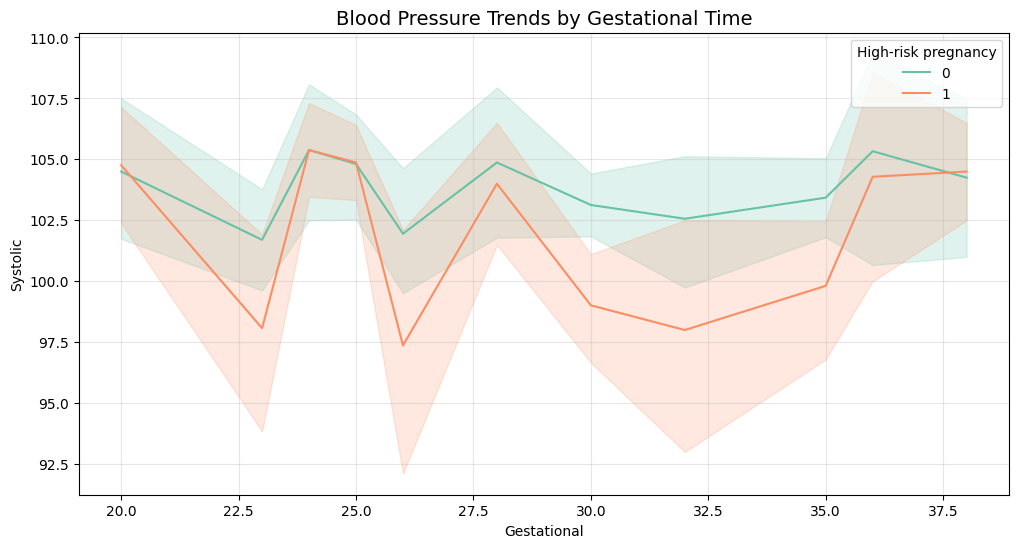

In [26]:
# Plot of Blood Pressure by Gestational time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Gestational', y='Systolic', hue='High-risk pregnancy',
             data=df, errorbar=('ci', 95), palette='Set2')
plt.title('Blood Pressure Trends by Gestational Time', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# **Random Forest with Gridsearch CV**

## Separate features (X) and target (y)

In [27]:
# Separate features (X) and target (y)
X = df.drop(['High-risk pregnancy', 'Age Group'], axis=1)  # Drop target, and Age Group columns
y = df['High-risk pregnancy']  # Target column

## Check again for missing values

In [28]:
# Check for missing values
print("Missing values in features:\n", X.isnull().sum())

Missing values in features:
 Age                 0
Gravida             0
Tetanus Toxoid      0
Gestational         0
Weight              0
Height in feet      0
Height in meter     0
Systolic            0
Diastolic           0
Anemia              0
Fetal position      0
Fetal Heart Beat    0
Urine test sugar    0
VDRL                0
HRsAG               0
ID                  0
BMI                 0
dtype: int64


## Randomly mask some labels to simulate unlabeled data

In [29]:
# Set the random seed for reproducibility
random.seed(42)  # You can choose any integer value as the seed

# Randomly mask some labels to simulate unlabeled data
mask_percentage = 0.3  # 30% of the labels will be masked
n_samples = len(y)
n_masked = int(n_samples * mask_percentage)

# Randomly select indices to mask
masked_indices = random.sample(range(n_samples), n_masked)

# Create a copy of y to mask labels
y_masked = y.copy()
for idx in masked_indices:
    y_masked.iloc[idx] = -1  # Set to -1 to indicate unlabeled

## Store the masked indices for later use

In [30]:
# Store the masked indices for later use
masked_indices_list = masked_indices
# Print the masked indices and corresponding y values
print("Masked Indices:", masked_indices_list)
print("\n Masked y values:", y.iloc[masked_indices_list].values)

Masked Indices: [654, 114, 25, 759, 281, 250, 228, 142, 754, 104, 692, 758, 913, 558, 89, 604, 432, 32, 30, 95, 223, 238, 517, 616, 27, 574, 203, 733, 665, 718, 984, 429, 225, 459, 603, 284, 828, 890, 6, 777, 825, 163, 714, 981, 348, 962, 159, 220, 781, 344, 988, 94, 389, 99, 367, 867, 352, 618, 270, 826, 44, 747, 470, 549, 127, 387, 80, 565, 300, 849, 643, 633, 906, 882, 370, 591, 196, 721, 71, 46, 677, 233, 791, 296, 81, 875, 976, 887, 103, 945, 952, 464, 650, 854, 373, 166, 379, 363, 214, 686, 273, 968, 699, 663, 73, 623, 905, 175, 546, 746, 992, 167, 473, 388, 276, 655, 704, 570, 224, 701, 332, 863, 786, 794, 57, 234, 841, 980, 824, 323, 410, 274, 67, 216, 580, 735, 322, 217, 671, 511, 405, 658, 469, 146, 271, 990, 252, 762, 972, 551, 269, 764, 598, 438, 597, 408, 923, 879, 141, 521, 505, 93, 773, 48, 112, 156, 642, 956, 811, 696, 954, 610, 65, 394, 390, 938, 479, 541, 257, 566, 11, 961, 738, 117, 698, 934, 768, 897, 787, 656, 953, 996, 929, 445, 161, 925, 3, 739, 736, 847, 512, 78

## Split into train (70%) and test (30%) sets and filterout the unlabeled data

In [31]:
# Combine labeled and unlabeled data
X_combined = X.copy()
y_combined = y_masked.copy()

# Split into train (70%) and test (30%) sets, including unlabeled data
X_train, X_test, y_train, y_test = train_test_split(
    X_combined,
    y_combined,
    test_size=0.3,    # 30% test data
    random_state=42,  # For reproducibility
    stratify=None      # We do not stratify since we have unlabeled data
)

# Verify shapes
print("Training shapes:", X_train.shape, y_train.shape)
print("Testing shapes:", X_test.shape, y_test.shape)

Training shapes: (698, 17) (698,)
Testing shapes: (300, 17) (300,)


In [32]:
X_train.columns

Index(['Age', 'Gravida', 'Tetanus Toxoid', 'Gestational', 'Weight',
       'Height in feet', 'Height in meter', 'Systolic', 'Diastolic', 'Anemia',
       'Fetal position', 'Fetal Heart Beat', 'Urine test sugar', 'VDRL',
       'HRsAG', 'ID', 'BMI'],
      dtype='object')

## Initialize the StandardScaler and fit the scaler on the training and test sets

In [33]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Define the parameter grid for hyperparameter tuning

In [34]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

## Initialize the Random Forest model

In [35]:
# Initialize the Random Forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize GridSearchCV

In [36]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=2,  # 2-fold cross validation
    n_jobs=-1,  # Use all available cores
    scoring='accuracy',
    verbose=2
)

## Fit the Gridsearch on the training data

In [37]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train_scaled[y_train != -1], y_train[y_train != -1])

Fitting 2 folds for each of 216 candidates, totalling 432 fits


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

## Make prediction using the best parameters

In [38]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", round(grid_search.best_score_,2))

# Evaluate on test set using the best model
best_rf = grid_search.best_estimator_

# Make prediction
y_pred = best_rf.predict(X_test_scaled)

print(f"\n {y_pred}")

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Accuracy Score: 0.91

 [0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0
 1 1 0 1]


## Perform cross-validation on the best model

In [39]:
# Perform cross-validation on the best model
cv_scores = cross_val_score(best_rf, X_train_scaled[y_train != -1], y_train[y_train != -1], cv=3)  # 3-fold cross-validation

# Print cross-validation results
print("Cross-Validation Scores:", list(cv_scores))
print("Mean Cross-Validation Score:", round(cv_scores.mean(),2))

Cross-Validation Scores: [0.9263803680981595, 0.8957055214723927, 0.9074074074074074]
Mean Cross-Validation Score: 0.91


# **Prediction of Materinal Risk**

In [56]:
# Make predictions
predictions = best_rf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test[y_test != -1], predictions[y_test != -1])

# Generate classification report
class_report = classification_report(y_test[y_test != -1], predictions[y_test != -1])

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(class_report)

Accuracy: 91.94%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       145
           1       0.89      0.85      0.87        66

    accuracy                           0.92       211
   macro avg       0.91      0.90      0.91       211
weighted avg       0.92      0.92      0.92       211



Confusion Matrix:
 [[138   7]
 [ 10  56]]


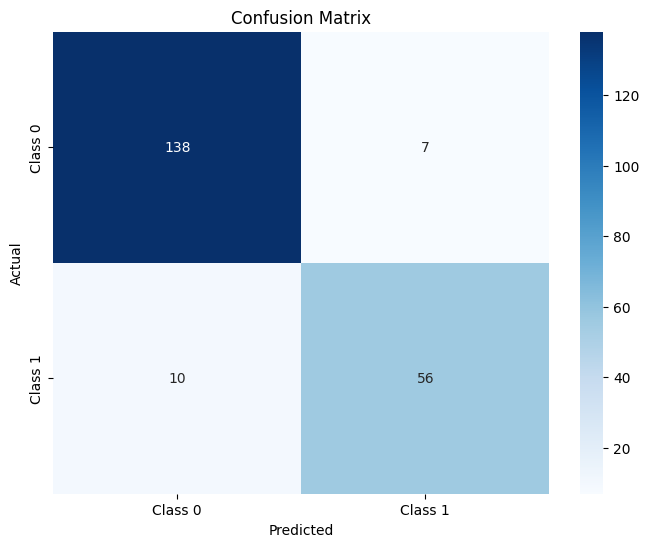

In [57]:
# Create confusion matrix
cm = confusion_matrix(y_test[y_test != -1], predictions[y_test != -1])
print("Confusion Matrix:\n", cm)
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()